In [1]:
from mcbj import *
from tqdm.notebook import tqdm

date = "22_02_03"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
blues = ['#000c33', '#002599', '#0032cc', '#003eff', '#406eff', '#809fff']  # blues
reds = ['#330000', '#660000', '#990000', '#cc0000', '#ff0000', '#ff4040']  # reds

In [17]:
rcParams['figure.constrained_layout.use'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['mathtext.rm'] = 'serif'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.labelsize'] = 6
rcParams['ytick.labelsize'] = 6
rcParams['xtick.major.pad'] = 1.5
rcParams['xtick.minor.pad'] = 0.5
rcParams['ytick.major.pad'] = 1
rcParams['ytick.minor.pad'] = 0.5
rcParams['axes.labelsize'] = 6
rcParams['axes.titlepad'] = 5.0
rcParams['axes.labelpad'] = 1.5
rcParams['agg.path.chunksize'] = 10000

In [3]:
count=0
push_trace_index = []
pull_trace_index = []
with open(home_folder.joinpath(f'results/IVs/random_2/Trace_indexes_push_good.txt')) as f:
    for line in f:
        push_trace_index.append(int(line.strip()))
        
with open(home_folder.joinpath(f'results/IVs/random_2/Trace_indexes_pull_good.txt')) as f:
    for line in f:
        pull_trace_index.append(int(line.strip()))
        
push_trace_index = np.array(push_trace_index)
pull_trace_index = np.array(pull_trace_index)

In [4]:
in_both = np.intersect1d(push_trace_index, pull_trace_index)
print(len(in_both))

83


In [5]:
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('royalblue', 'firebrick')
smoothing = 10

In [26]:
# which_trace = np.random.choice(in_both)
which_trace=22718
print(which_trace)

22718


In [27]:
hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0.00126,
                       r_serial_ohm=100_000, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
# hold_trace.plot_ivs(smoothing=10, after_plateau=0)
hold_trace.analyse_hold_trace(num_of_fft=5)

D:\Greta\mcbj_stm-bj\mcbj.py:2661: RuntimeWarning: divide by zero encountered in true_divide
  multiplier = np.array([utils.Constants.r0 ** 2 / bias_steps ** 2])


D:\Greta\mcbj_stm-bj\mcbj.py:2661: RuntimeWarning: divide by zero encountered in true_divide
  multiplier = np.array([utils.Constants.r0 ** 2 / bias_steps ** 2])
C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_11876/607777039.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_push.set_xticklabels(['']*len(ax_push.get_xticks()))


bias_steps [0.2000122 0.        0.2000122]
bias_steps [0.2000122 0.        0.2000122]


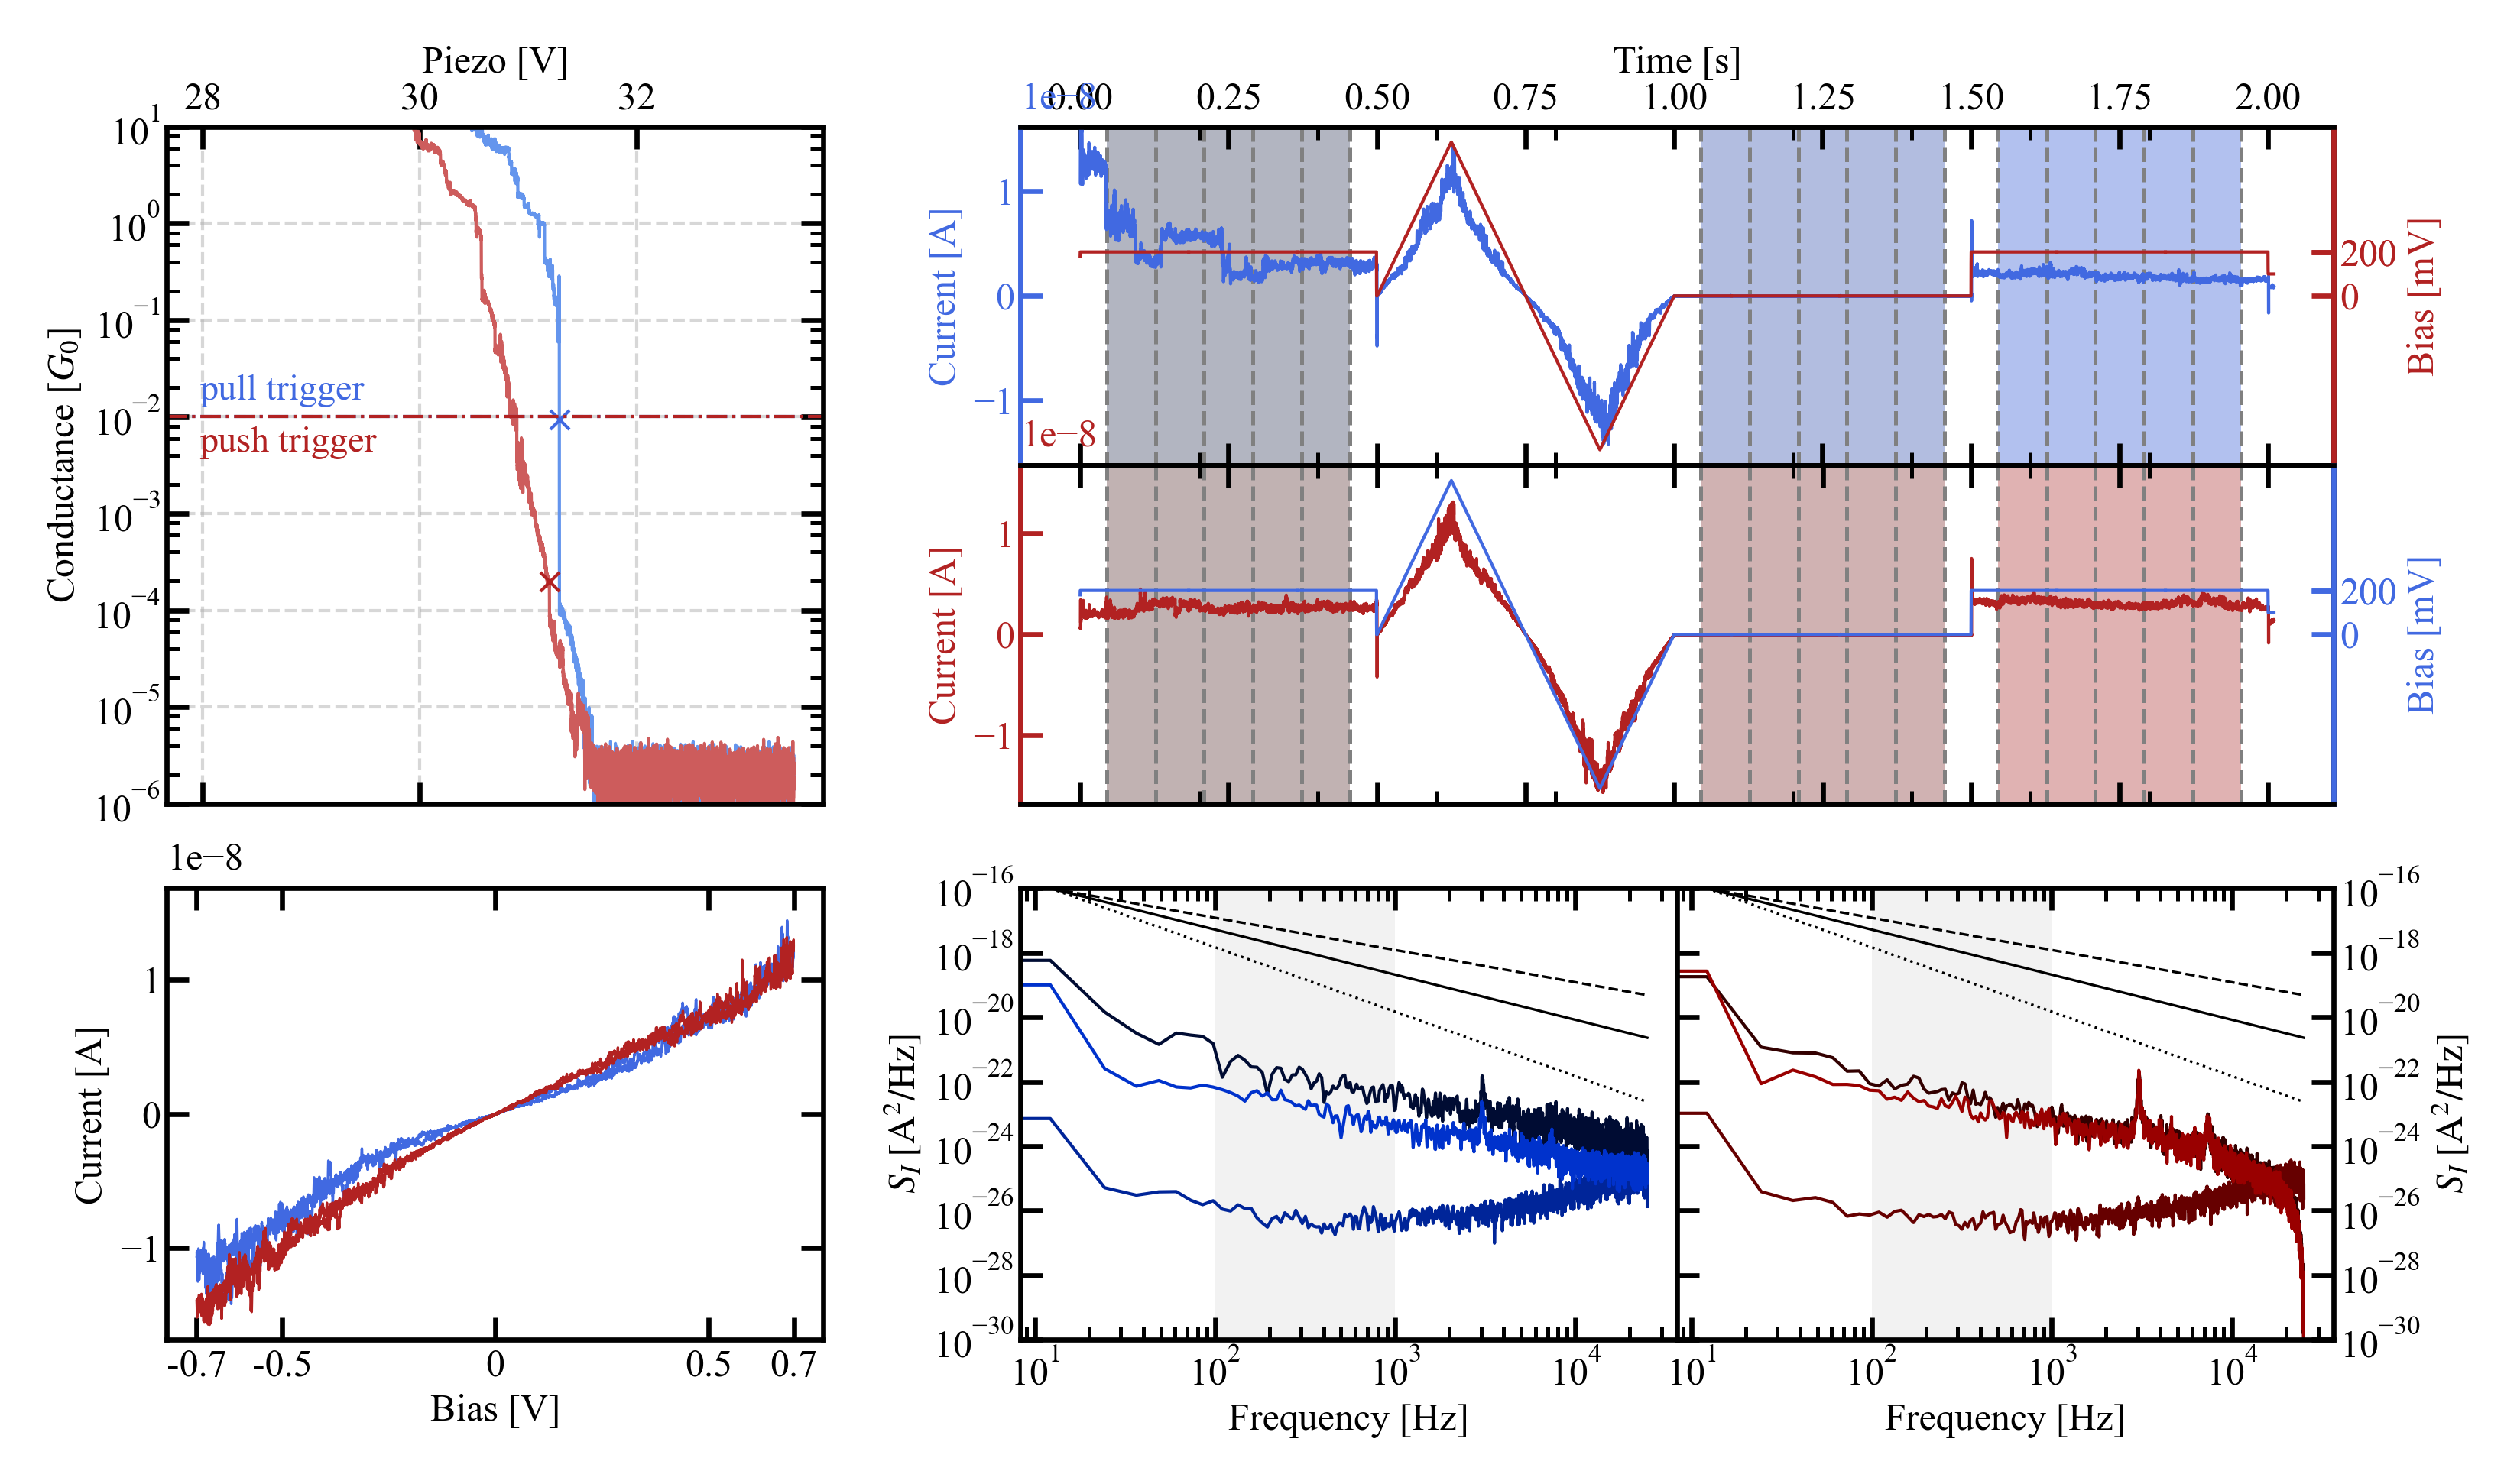

In [28]:
fig = plt.figure(figsize=utils.cm2inch(15, 8.4), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(3, 2),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.15)

gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, width_ratios=(1, 2),
                                          subplot_spec=gs_total[0],
                                          wspace=0.2, hspace=0)

gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(1, 2),
                                             subplot_spec=gs_total[1],
                                             wspace=0.2, hspace=0)

gs_bottom_right = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                                             subplot_spec=gs_bottom[1],
                                             wspace=0, hspace=0)

ax_trace = fig.add_subplot(gs_top[:, 0])
ax_pull = fig.add_subplot(gs_top[0, 1])
ax_push = fig.add_subplot(gs_top[1, 1])

ax_iv = fig.add_subplot(gs_bottom[0])
ax_psd_pull = fig.add_subplot(gs_bottom_right[0])
ax_psd_push = fig.add_subplot(gs_bottom_right[1], sharey=ax_psd_pull)

ax_trace.xaxis.set_label_position('top')
ax_trace.xaxis.tick_top()
ax_trace.xaxis.set_ticks_position('both')
ax_trace.yaxis.set_ticks_position('both')

ax_pull.xaxis.set_ticks_position('both')
ax_pull.xaxis.set_label_position('top')
ax_pull.xaxis.tick_top()
# ax_pull.yaxis.set_ticks_position('both')
# ax_pull.yaxis.set_label_position('right')
# ax_pull.yaxis.tick_right()

# ax_push.yaxis.set_ticks_position('both')
# ax_push.yaxis.set_label_position('right')
# ax_push.yaxis.tick_right()

ax_iv.xaxis.set_ticks_position('both')
ax_iv.yaxis.set_ticks_position('both')

ax_psd_pull.xaxis.set_ticks_position('both')
ax_psd_push.xaxis.set_ticks_position('both')

ax_psd_push.yaxis.tick_right()
ax_psd_push.yaxis.set_ticks_position('both')
ax_psd_push.yaxis.set_label_position('right')


ax_trace = trace_pair.plot_trace_pair(ax=ax_trace, xlim=None,
                                      main_colors=main_colors,
                                      accent_colors=accent_colors,
                                      smoothing=smoothing, plot_trigger=True)

text_pos_pull = (ax_trace.get_xlim()[0] + (ax_trace.get_xlim()[1]-ax_trace.get_xlim()[0]) * 0.05,
                 1.5*trace_pair.hold_set_pull)
text_pos_push = (ax_trace.get_xlim()[0] + (ax_trace.get_xlim()[1]-ax_trace.get_xlim()[0]) * 0.05,
                 0.8*trace_pair.hold_set_push)

ax_trace.text(text_pos_pull[0], text_pos_pull[1], 'pull trigger', fontsize='xx-small', c=accent_colors[0])
ax_trace.text(text_pos_push[0], text_pos_push[1], 'push trigger', fontsize='xx-small', c=accent_colors[1],
              va='top')

hold_trace.analyse_hold_trace(num_of_fft=5)

# I(V)
# pull
data_pull = hold_trace.hold_current_pull
label_text = "Current [A]"

ranges_pull = (hold_trace.bias_steps_ranges_pull[0, 1] + 50,
               hold_trace.bias_steps_ranges_pull[0 + 1, 0])
len_pull = ranges_pull[1] - ranges_pull[0]

# push
data_push = hold_trace.hold_current_push
label_text = "Current [A]"

ranges_push = (hold_trace.bias_steps_ranges_push[0, 1] + 50,
               hold_trace.bias_steps_ranges_push[0 + 1, 0])
len_push = ranges_push[1] - ranges_push[0]

ax_iv.plot(utils.moving_average(hold_trace.hold_bias_pull[ranges_pull[0]:ranges_pull[1]], smoothing),
           utils.moving_average(data_pull[ranges_pull[0]:ranges_pull[1]], smoothing),
           c=accent_colors[0], lw=0.4)

ax_iv.plot(utils.moving_average(hold_trace.hold_bias_push[ranges_push[0]:ranges_push[1]], smoothing),
           utils.moving_average(data_push[ranges_push[0]:ranges_push[1]], smoothing),
           c=accent_colors[1], lw=0.4)

ax_iv.set_xlabel('Bias [V]')
ax_iv.set_ylabel(label_text)

max_curr_pull = max(abs(data_pull[ranges_pull[0]:ranges_pull[1]]))
max_curr_push = max(abs(data_push[ranges_push[0]:ranges_push[1]]))

ax_iv.set_ylim(-1*max(max_curr_pull, max_curr_push), max(max_curr_pull, max_curr_push))
ax_iv.set_xticks([-0.7, -0.5, 0, 0.5, 0.7])
ax_iv.set_xticklabels(['-0.7', '-0.5', '0', '0.5', '0.7'])

ax_pull, par_pull = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=False, conductance=False,
                                                ax=ax_pull, log_scale_y=False,
                                                ax_colors=accent_colors,
                                                smoothing=smoothing)
ax_push, par_push = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=False, conductance=False,
                                                ax=ax_push, log_scale_y=False,
                                                ax_colors=accent_colors,
                                                smoothing=smoothing,
                                                pull=False, push=True)

ax_pull.set_ylim(-1*max_curr_pull, max_curr_pull)
ax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax_push.set_ylim(-1*max_curr_push, max_curr_push)
ax_push.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax_push.set_xlabel('')
ax_push.set_xticklabels(['']*len(ax_push.get_xticks()))

for i, interval in enumerate(hold_trace.psd_interval_ranges_pull):
    ax_pull.axvspan(interval[0]/50_000, interval[-1]/50_000, color=blues[i], ec=None, alpha=0.3)
    
    for j in interval:
        ax_pull.axvline(j/50_000, ls='--', c='grey', lw=0.6)

for i, interval in enumerate(hold_trace.psd_interval_ranges_push):
    ax_push.axvspan(interval[0]/50_000, interval[-1]/50_000, color=reds[i], ec=None, alpha=0.3)    
    
    for j in interval:
        ax_push.axvline(j/50_000, ls='--', c='grey', lw=0.6)
    
ax_psd_pull = hold_trace.plot_psds(ax=ax_psd_pull, plot_legend=False)
ax_psd_push = hold_trace.plot_psds(ax=ax_psd_push, pull=False, plot_legend=False)

plt.savefig(home_folder.joinpath(f'results/article/measurement_scheme_{which_trace}_ivs_psd.png'))

In [10]:
print(max_curr_pull)

1.0522185e-06


In [12]:
data_pull[ranges_pull[0]:ranges_pull[1]])

1.0506621e-06

In [21]:
hold_trace.psd_interval_ranges_pull

array([[ 2235,  6331, 10427, 14523, 18619, 22715],
       [52259, 56355, 60451, 64547, 68643, 72739],
       [77260, 81356, 85452, 89548, 93644, 97740]], dtype=int64)